In [7]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [8]:
# rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-32.c-14.es-100.w-32.log
def read_logs(pattern):
    dfs = []
    for fn in glob.glob(pattern):
        m = re.match(".+\.(?P<ts>\d+)\.nc-(?P<nc>\d+).c-(?P<c>\d+).es-(?P<es>\d+).w-(?P<w>\d+)", fn)
        if not m:
            continue
        print fn
        df = pd.read_csv(fn, sep=',', header=1, names=('start', 'end'))
        df['ts'] = m.group('ts')
        df['nclients'] = m.group('nc')
        df['clientid'] = m.group('c')
        df['esize'] = m.group('es')
        df['width'] = m.group('w')
        df['lat_ms'] = (df['end'] - df['start']) / 1000000.0
        dfs.append(df)
    return pd.concat(dfs)

In [11]:
def plot(df):
    for nclients in df.nclients.unique():
        f, ax = plt.subplots(1, 1)
        ax.set_title("%s clients" % (nclients,))
        dfnc = df[df.nclients == nclients]
        entry_sizes = dfnc.esize.unique()
        entry_sizes.sort()
        for entry_size in entry_sizes:
            label = "%s bytes" % (entry_size,)
            dfes = dfnc[dfnc.esize == entry_size]
            sns.distplot(dfes.head(1000).lat_ms,
                         hist_kws=dict(cumulative=True),
                         kde_kws=dict(cumulative=True),
                         label=label, ax=ax)
            ax.legend()
        f.savefig("nclients-%s.png" % (nclients,))

rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-1.c-1.es-10.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-1.c-1.es-100.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-1.c-1.es-1000.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-4.c-2.es-10.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-4.c-2.es-1000.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-4.c-2.es-100.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-4.c-1.es-100.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-4.c-3.es-100.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-4.c-3.es-10.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-4.c-4.es-10.w-32.log
rep1x/client0.nwatkins-qv27013.zlog-pg0.wisc.cloudlab.us.1499807976.nc-4

KeyboardInterrupt: 

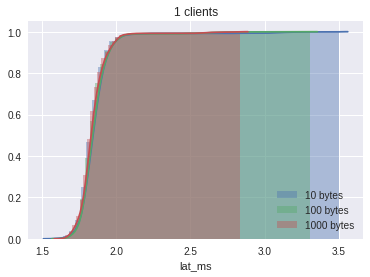

In [12]:
for nc in [1,4,8,16,32]:
    df = read_logs("rep1x/*.nc-%d.c-*.log" % (nc,))
    plot(df)